In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.family': 'stixgeneral'})

Suppose we have a farm with a large number of sheep and goats. We know from experience that the weight of the goats is normally distributed with a mean of 130 lbs and a standard deviation of 10 lbs. The sheep have a mean weight of 140 lbs and a standard deviation of 10 lbs.

We want to determine if an animal is a sheep or goat simply by weighing it. We can think of this as a one-feature classification model, or, alternatively as a hyopthesis test.

First, we will think of it as an hypothesis test using the classical (frequentist) approach. According to the classical approach, we will start by specifying a null hypothesis ($H_0$) and we will assume this hypothesis is true unless we encounter evidence that convinces us otherwise.  Rather arbitrarily, we will pick goats as our null hypothesis:

$$H_0 = \text{the animal is a goat}$$

more specifically:

$$H_0 = \text{the weight of the animal is drawn from a normal distribution with } \mu = 130 \text { and } \sigma = 10$$

Somtimes we will see the character $\sim$ meaining "Is a *Random Variable* distributed according to a distribution with a given shape and parameters." 

$$H_0: Weight \sim Normal(\mu = 130, \sigma = 10)$$

The alternative hypothesis ($H_a$) is simply the complement of $H_0$. We can include the fact that sheep are generally heavier than goats to make it a one-sided test:
$$H_a = \text{the weight of the animal is drawn from a normal distribution with } \mu > 130, \sigma = 10$$

$$H_a = Weight \sim Normal (\mu > 130, \sigma = 10)$$

Notice that, at this point, we are not using the weights of the sheep ($\mu_{sheep} = 140$) as this would create two criteria with an undefined zone between them.

We need a *test statistic* to measure our experiment. A test statistic is a single number that quantifies the results of a single run of the experiment. In our situation, an experiment is just weighing of one animal, so we can simply use the measured weight as our test statistic. Each time we run the experiment, we will get a single value, which varies from run to run. If we run the experiment a large number of times, we can see that the test statistic has some predictable distribution, i.e. it is a random variable described by some parameters.


In the olden days, we did not have computers that could easily calculate the area under gaussian curves with arbitrary parameters such as $\mu = 130$ and $\sigma = 10$, but we did have tables of pre-calcualted values for the *standard normal curve*, i.e., a distribution with $\mu=0$ and $\sigma=1$, so we found it convenient to "standardize" our test statistic by substracting $\mu$ and dividing by $\sigma$.

$$\text {test}\text { } \text {statistic} = \frac {weight-\mu}{\sigma}$$

Thanks to modern computers, this step is no longer necessary, but it helps to illustrate the point that a test statistic is single number that quantifies the results of a single run of the experiment - and is not necessarily the measured result of the experiment. Separating the test statistic from the measurement like this becomes useful for more complicated experiments.

Knowing that the test statistic can take on a range of values, we can use it to separate results of our experiment into two separate categories:
* values that are expected to arise under the assumption that $H_0$ is true
* values that seem unusual, if we assume $H_0$ is true.

To add a little more rigor to the qualitative terms "expected" and "unusual", we introduce the value $\alpha$. A choice of $\alpha = 0.05$ (as is typical), can be interpreted as "An experiment that is no more unusal than 95% of all such experiments is considered "expected"; an experiment that is more unusual than 95% of all such experiments is  sufficiently unusual to convince us to reject $H_0$.

It is important to remember that $\alpha$ represents the percentage of experiments that would reject $H_0$. Since the area under the test-statistic distribution curve represents 100% of all experiments performed, $\alpha$ is the area under one (or both) tails.

On one side, the area $\alpha$ is bounded by a threshold value of the test statistic. Experiments that produce test statistics to one side of this threshold are considered "expected: do not reject $H_0$", and values on the other side are considered "unusual: reject $H_0$"

In the example below, we use scipy.stats to calcualte the values using the formulas for gaussian curves.

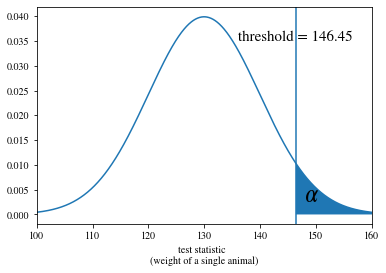

In [2]:
𝜇_goat = 130
𝜎_goat = 10
𝛼=0.05

goat = norm(𝜇_goat, 𝜎_goat)

threshold = goat.ppf(1-𝛼)

lo, hi = goat.ppf([0.001,0.999])
weight_range = np.linspace(lo, hi, 1001)
𝛼_range = np.linspace(threshold, hi, 101)

plt.plot(weight_range, goat.pdf(weight_range))
plt.axvline(threshold);
plt.fill_between(𝛼_range, goat.pdf(𝛼_range))
plt.annotate(f'threshold = {round(threshold,2)}', (136,0.035), fontsize = 15)
plt.annotate("𝛼", (148,0.0025), fontsize = 25)
plt.xlabel('test statistic  \n(weight of a single animal)')
plt.xlim([100,160]);

Another approach is to simulate a large number of goats, sort them by weight and then draw a dividing line just after the 95th percentile goat. Here we are using brute-force calculation to substitute for calculus.

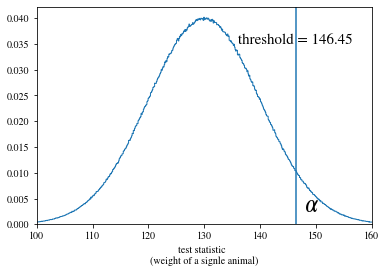

In [3]:
goats = goat.rvs(10**7)
threshold = np.sort(goats)[int(.95*len(goats))]

plt.hist(goats, histtype = 'step', bins = 1000, density = True )

plt.axvline(threshold)
plt.xlim([100,160])
plt.annotate(f'threshold = {round(threshold,2)}', (136,0.035), fontsize = 15)
plt.annotate("𝛼", (148,0.0025), fontsize = 25)
plt.xlabel('test statistic  \n(weight of a signle animal)');


As you can see, this produces the same result as above, verifying that Gauss did his integrals correctly.

Now that we have established our threshold, we can see how well it classifies goats:

In [4]:
correctly_classified_goats = (goats<threshold).mean()
print(f'Correctly classified goats: {correctly_classified_goats}')

Correctly classified goats: 0.95


In [5]:
incorrectly_classified_goats = (goats>=threshold).mean()
print(f'Incorrectly classified goats: {incorrectly_classified_goats}')

Incorrectly classified goats: 0.05


The values of 95% and 5% are what we would expect, given that we set $\alpha=.05$

Now, let's see how good this test is at identifying sheep:

In [6]:
𝜇_sheep = 140
𝜎_sheep = 10

sheep = norm(𝜇_sheep, 𝜎_sheep)
sheeps = sheep.rvs(10**7)

correctly_classified_sheep = (sheeps>=threshold).mean()
print(f'Correctly classified sheep: {correctly_classified_sheep}')

Correctly classified sheep: 0.2592936


In [7]:
incorrectly_classified_sheep = (sheeps<threshold).mean()
print(f'Incorrectly classified sheep: {incorrectly_classified_sheep}')

Incorrectly classified sheep: 0.7407064


Unfortunately, this is telling us that our model is not very good at classifying sheep. 

$$\text {Type} \text { }\text {II} \text { } \text {error} \text { } \text {rate} = \beta \approx 0.74$$

This is because there is a large amount of overlap between goats and sheep. Any animal in the range of about 125 to 145 could be either a goat or a sheep.

Let's visualize the portion of the sheep population that weighs less than the threshold value:

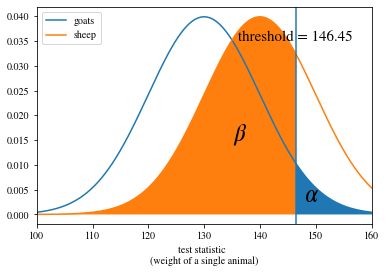

In [8]:
𝛽_range = np.linspace(lo, threshold, 101)

plt.plot(weight_range, goat.pdf(weight_range), label = 'goats')
plt.plot(weight_range, sheep.pdf(weight_range), label = 'sheep')

plt.axvline(threshold);

plt.fill_between(𝛼_range, goat.pdf(𝛼_range))
plt.fill_between(𝛽_range, sheep.pdf(𝛽_range))

plt.annotate(f'threshold = {round(threshold,2)}', (136,0.035), fontsize = 15)
plt.annotate("𝛼", (148,0.0025), fontsize = 25)
plt.annotate("𝛽", (135,0.015), fontsize = 25)
plt.xlabel('test statistic  \n(weight of a single animal)')
plt.xlim([100,160])
plt.legend(loc = 'upper left');

Notice that $\alpha$ and $\beta$ are not directly related to each other: they are areas under different curves.

Here, the orange area, $\beta$ represents the portion of the sheep which weigh less than the threshold value and are therefore inocrrectly classified as goats.  Clearly, this is not a very good test. Generally, we consider a test to be good when $\beta < .2$, or equivalently: $Power = 1 - \beta \ge .8$

To make this a better test, we want to decrease the orange area, without increasing the blue area. 

## Factors that Affect $\beta$

There are four factors that influnce the value of $Power$, two that we have control over:
* our choice of $\alpha$ 
* the number of samples in our experiment

and two that we don't have control over:
* the effect size 
* the population standard deviation

Let's first look at *effect size*, which is the difference between $\mu_{goat}$ and $\mu_{sheep}$

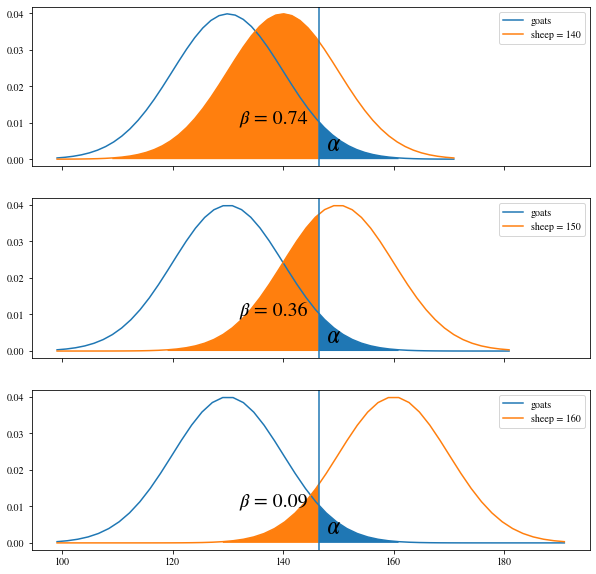

In [9]:
fig, axs = plt.subplots(3, 1, figsize = (10,10), sharex = True)


for ax, effect in zip(axs, [10, 20, 30]):
    sheep = norm(130+effect, 10)
    weight_range = np.linspace(goat.ppf(.001), sheep.ppf(.999))
    𝛽_range = np.linspace(sheep.ppf(.001), threshold, 101)
    
    ax.plot(weight_range, goat.pdf(weight_range), label = 'goats')
    ax.plot(weight_range, sheep.pdf(weight_range), label = f'sheep = {130+effect}')
    
    ax.axvline(threshold);
    
    ax.fill_between(𝛼_range, goat.pdf(𝛼_range))
    ax.fill_between(𝛽_range, sheep.pdf(𝛽_range))
    
    ax.annotate("𝛼", (148,0.0025), fontsize = 25)
    ax.annotate(f"𝛽 = {round(sheep.cdf(threshold),2)}", (132, .01), fontsize = 20)
    ax.legend()

As you can see, increasing the effect size (while holding goats constant) does not change $\alpha$ or the threshold, but it does result in decreasing $\beta$ as the two populations move farther apart.

Now, let's look at the effect of changes to the population standard deviation (maintaining the assumption that $\sigma_{goats} = \sigma_{sheep}$)

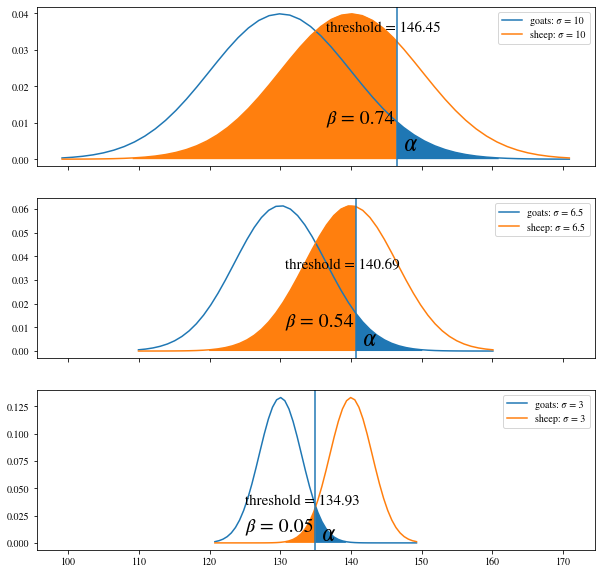

In [10]:
fig, axs = plt.subplots(3, 1, figsize = (10,10), sharex = True)


for ax, 𝜎 in zip(axs, [10, 6.5, 3]):
    goat = norm(𝜇_goat, 𝜎)
    sheep = norm(𝜇_sheep, 𝜎)
    
    threshold = goat.ppf(1-𝛼)
    
    
    weight_range = np.linspace(goat.ppf(.001), sheep.ppf(.999))
    𝛼_range = np.linspace(threshold, goat.ppf(.999), 101)
    𝛽_range = np.linspace(sheep.ppf(.001), threshold, 101)
    
    ax.plot(weight_range, goat.pdf(weight_range), label = f'goats: 𝜎 = {𝜎} ')
    ax.plot(weight_range, sheep.pdf(weight_range), label = f'sheep: 𝜎 = {𝜎}')
    
    ax.axvline(threshold);
    
    ax.fill_between(𝛼_range, goat.pdf(𝛼_range))
    ax.fill_between(𝛽_range, sheep.pdf(𝛽_range))
    
    ax.annotate("𝛼", (threshold+1,0.0025), fontsize = 25)
    ax.annotate(f"𝛽 = {round(sheep.cdf(threshold),2)}", (threshold - 10, .01), fontsize = 20)
    ax.annotate(f'threshold = {round(threshold,2)}', (threshold-10,0.035), fontsize = 15)

    ax.legend()

Decreasing the population standard deviation has the effect of narrowing the distirbutions of the test statistics, which changes the threshold, while holding $\alpha$ constant, and results in decreased $\beta$

Another option to control $\beta$ is to change our choice of $\alpha$. There is a trade-off between $\alpha$ and $\beta$: as Type I error increases, Type II error decreases.

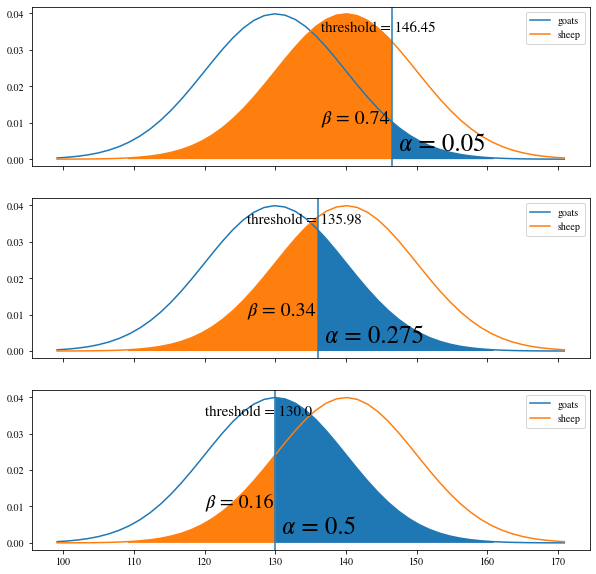

In [11]:
fig, axs = plt.subplots(3, 1, figsize = (10,10), sharex = True)


for ax, 𝛼 in zip(axs, np.linspace(.05, .5, 3)):
    goat = norm(𝜇_goat, 𝜎_goat)
    sheep = norm(𝜇_sheep, 𝜎_sheep)
    
    threshold = goat.ppf(1-𝛼)
    
    
    weight_range = np.linspace(goat.ppf(.001), sheep.ppf(.999))
    𝛼_range = np.linspace(threshold, goat.ppf(.999), 101)
    𝛽_range = np.linspace(sheep.ppf(.001), threshold, 101)
    
    ax.plot(weight_range, goat.pdf(weight_range), label = 'goats')
    ax.plot(weight_range, sheep.pdf(weight_range), label = 'sheep')
    
    ax.axvline(threshold);
    
    ax.fill_between(𝛼_range, goat.pdf(𝛼_range))
    ax.fill_between(𝛽_range, sheep.pdf(𝛽_range))
    
    ax.annotate(f'𝛼 = {𝛼}', (threshold+1,0.0025), fontsize = 25)
    ax.annotate(f"𝛽 = {round(sheep.cdf(threshold),2)}", (threshold - 10, .01), fontsize = 20)
    ax.annotate(f'threshold = {round(threshold,2)}', (threshold-10,0.035), fontsize = 15)

    ax.legend()

Generally, this is not a reasonable approach because the value of 𝛼 is set according to business needs and the downside to larger 𝛼 is generally the same (or sometimes worse) than large $\beta$.

Our final option for controlling $\beta$, and the only reasonable option we have in most real-world scenarios, is to adjust $n$, the number of samples in our experiment.

Up until now, we have only been weighing one animal at a time. Suppose we now weigh $n$ animals at a time, knowing that sheep and goats do not intermingle, so all the animals weighed together will be of the same type.

Our test statistic now is not the weight of one animal, but the average weight of $n$ animals, so we have to recalculate the distribution of our test statistic.

Let's start with the brute-force appraoch:

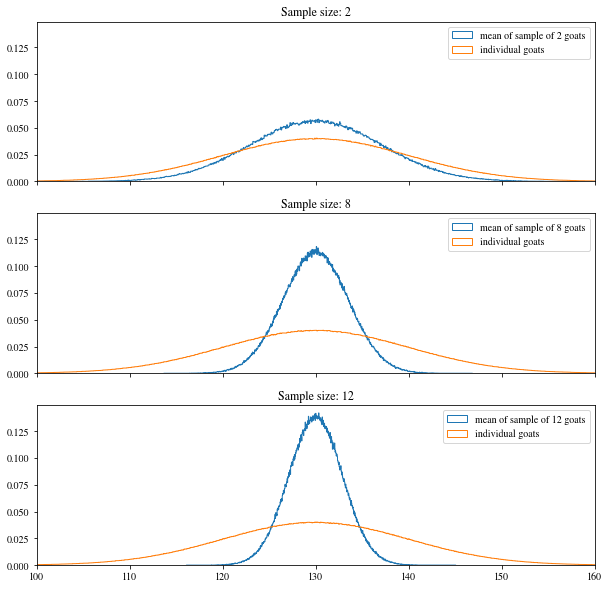

In [12]:
fig, axs = plt.subplots(3, 1, figsize = (10,10), sharex = True, sharey=True)

for ax, n in zip(axs, [2,8, 12]):
    goat = norm(𝜇_goat, 𝜎_goat)
    goats = goat.rvs(size = (10**6,n)).mean(axis = 1)
    
    ax.hist(goats, histtype = 'step', bins = 1000, density = True, label = f'mean of sample of {n} goats')
    ax.hist(goat.rvs(10**7), histtype = 'step', bins = 1000, density = True, label = 'individual goats')
    ax.set_title(f'Sample size: {n}')
    ax.set_xlim([100,160])
    ax.legend()

Notice that increasing the sample size and averaging the weights together has an effect similar to changing the $\sigma$ of the population (i.e, it makes the distirbution narrower), even though we have not changed the population parameters of $\mu = 130$ and $\sigma = 10$.

It also has the effect (according to the central limit theorm) of making the distribution of the test statistic more normal (if it weren't already normal to begin with).

While we can see that the standard deviation of the test statistic decreases as *n* increases, the exact nature of this relationship is not readily apparent. We can explore it by measuring how it changes over a range of *n*.

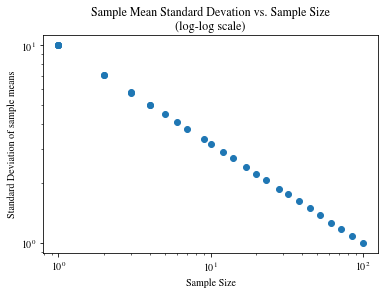

In [13]:
ns = np.logspace(0, 2, 30).astype(int)
stds = []

for n in ns:
    goats = goat.rvs(size = (10**5,n)).mean(axis = 1)
    stds.append(goats.std())

plt.scatter(ns, stds)
plt.xlabel('Sample Size')
plt.ylabel('Standard Deviation of sample means')
plt.yscale('log')
plt.xscale('log')
plt.title('Sample Mean Standard Devation vs. Sample Size\n(log-log scale)');

On a log-log scale, this appears to be a straight line, which implies a relationship of the form:

$$\log_{10}(\sigma_{\text {sample mean}}) = m \cdot \log_{10}(\text {sample size}) + b$$

or 


$$ y = m\cdot x + b$$

where

$$ y = \log_{10}(\sigma_{\text {sample mean}})$$



$$ x = \log_{10}(\text {sample size}) $$



$$ m = slope$$



$$ b = intercept$$



We can use linear regression to learn the parameters $m$ and $b$.

In [14]:
from sklearn.linear_model import LinearRegression as LR
linear_fit = LR().fit(np.log10(ns).reshape(-1,1), np.log10(stds))
m , b = linear_fit.coef_[0], linear_fit.intercept_
print(f'Slope: {m}, Intercept: {b}')

Slope: -0.49994856207937843, Intercept: 0.9999593985937101


Using $m = -.5$ and $b = 1$, we can re-arrange:

$$\log_{10}(\sigma_{\text {sample mean}}) = m \cdot \log_{10}(n) + b$$

$$\sigma_{\text {sample mean}} = \frac {10}{\sqrt{n}} = \frac {\sigma_{\text {population}}}{\sqrt{n}}$$

This tells us how the distibution of our test statistic changes when sample size changes.

Using this formula, we can now explore the effect of changing sample size on $\beta$ and Power.

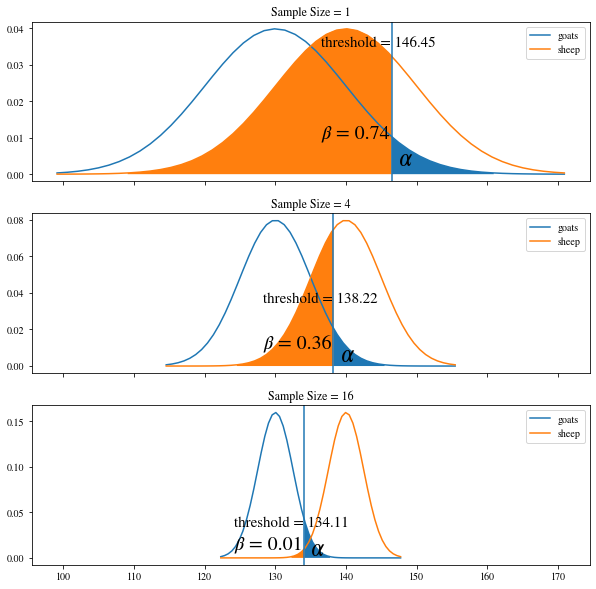

In [15]:
fig, axs = plt.subplots(3, 1, figsize = (10,10), sharex = True)

𝛼 = 0.05

for ax, n in zip(axs, [1,4,16]):
    goat = norm(𝜇_goat, 𝜎_goat/(n**.5))
    sheep = norm(𝜇_sheep, 𝜎_sheep/(n**.5))
    
    threshold = goat.ppf(1-𝛼)
    
    weight_range = np.linspace(goat.ppf(.001), sheep.ppf(.999))
    𝛼_range = np.linspace(threshold, goat.ppf(.999), 101)
    𝛽_range = np.linspace(sheep.ppf(.001), threshold, 101)
    
    ax.plot(weight_range, goat.pdf(weight_range), label = 'goats')
    ax.plot(weight_range, sheep.pdf(weight_range), label = 'sheep')
    
    ax.axvline(threshold);
    
    ax.fill_between(𝛼_range, goat.pdf(𝛼_range))
    ax.fill_between(𝛽_range, sheep.pdf(𝛽_range))
    
    ax.annotate("𝛼", (threshold+1,0.0025), fontsize = 25)
    ax.annotate(f"𝛽 = {round(sheep.cdf(threshold),2)}", (threshold - 10, .01), fontsize = 20)
    ax.annotate(f'threshold = {round(threshold,2)}', (threshold-10,0.035), fontsize = 15)
    ax.set_title(f'Sample Size = {n}')

    ax.legend()

We have achiefved our goal of decreasing the orange area without increasing the blue area.

We can verify that this works using the brute-force method:

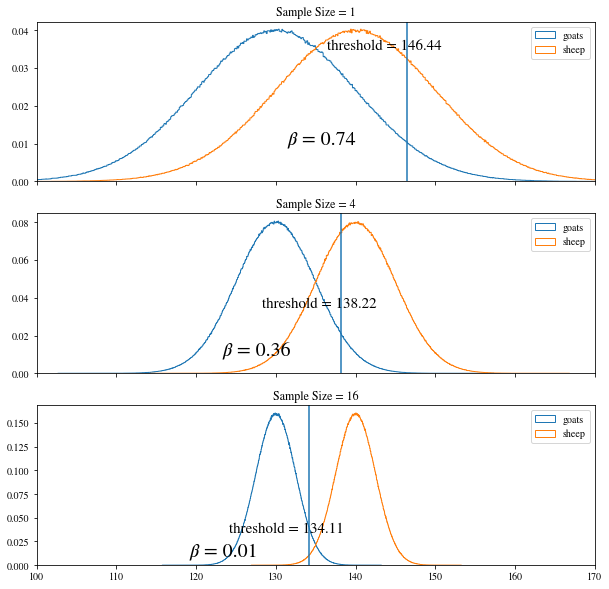

In [16]:
fig, axs = plt.subplots(3, 1, figsize = (10,10), sharex = True)

𝛼 = 0.05

for ax, n in zip(axs, [1,4,16]):
    goat = norm(𝜇_goat, 𝜎_goat)
    sheep = norm(𝜇_sheep, 𝜎_sheep)
    
    goats = goat.rvs((10**7, n)).mean(axis = 1)
    sheeps = sheep.rvs((10**7, n)).mean(axis = 1)
    
    threshold = np.sort(goats)[int(.95*len(goats))]
    
    𝛽 = (sheeps < threshold).mean()

    ax.hist(goats, histtype = 'step', bins = 1000, density = True, label = 'goats')
    ax.hist(sheeps, histtype = 'step', bins = 1000, density = True, label = 'sheep')
    
    if False:
        '''Include this section to overlay Normal Plots'''
        goat_dist = norm(𝜇_goat, 𝜎_goat/(n**.5))
        sheep_dist = norm(𝜇_sheep, 𝜎_sheep/(n**.5))
        ax.plot(weight_range, goat_dist.pdf(weight_range), label = 'goats')
        ax.plot(weight_range, sheep_dist.pdf(weight_range), label = 'sheep')

    ax.axvline(threshold);
    
    ax.annotate(f"𝛽 = {round(𝛽,2)}", (threshold - 15, .01), fontsize = 20)
    ax.annotate(f'threshold = {round(threshold,2)}', (threshold-10,0.035), fontsize = 15)
    ax.set_title(f'Sample Size = {n}')
    ax.set_xlim([100,170])
    ax.legend()

## Performing the Experiment

Now that we have set up our experiment, we can test our hypothesis. To recap:

* $H_0$: a group of *n* animals have weights drawn from a normal distribution with $\mu = 130$ and $\sigma = 10$

$$H_0: \text {test} \text { } \text {statistic} \sim Normal \left( \mu = 130, \sigma = \frac {10}{n^{\tfrac {1}{2}}} \right)$$

* $H_a$: the weights are drawn from a normal distribution with $\mu \ge 130$ and $\sigma = 10$

$$H_a: \text {test} \text { } \text {statistic} \sim Normal \left( \mu \gt 130, \sigma = \frac {10}{n^{\tfrac {1}{2}}} \right)$$

* $\alpha$ = 0.05
* Resources only permit us to use $n = 7$
* We want to achieve a $\beta < 0.2$ when effect size is $10$

First, we calculate the threshold value:

The threshold value can be calculated from a normal distribution of the test statistic, which has $\mu = 130$ and $\sigma_{\text {sample mean}} = \frac {\sigma_{population}}{\sqrt{n}} = \frac {10}{\sqrt {7}}$

In [17]:
𝛼 = 0.05
n = 7
effect_size = 10
𝜇_goats = 130
𝜇_sheep = 𝜇_goats + effect_size

𝜎_populaton = 10
𝜎_sample = 𝜎_populaton/n**.5

test_statistic = norm(𝜇_goats, 𝜎_sample)
threshold = test_statistic.ppf(1-𝛼)

print(f'Threshold:  {threshold}')

Threshold:  136.2169623428803


At this threshold, $\beta$ can be calculated:

In [18]:
𝛽 = norm(𝜇_sheep, 𝜎_sample).cdf(threshold)
print(f'𝛽: {𝛽}')

𝛽: 0.1584381381506566


Because $\beta \le 0.2$, we have a capable experiment.

We now gather a sample of $n$ goats, weigh them, take the average and make a determination:

In [19]:
if goat.rvs(n).mean() < threshold:
    print('Goats')
else:
    print('Sheep')


Goats


And gather a sample of $n$ sheep, weigh them, take the average and make a determination:

In [20]:
if sheep.rvs(n).mean() < threshold:
    print('Goats')
else:
    print('Sheep')

Sheep


If we repeat this experiment a large number of times, we expect to see about 5% of goats misclassified:

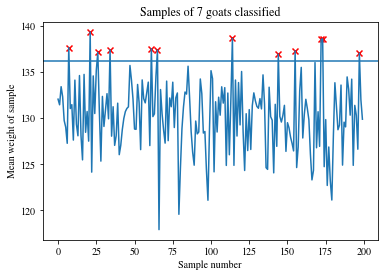

In [21]:
goat_samples = goat.rvs((200,n)).mean(axis = 1)

plt.plot(goat_samples)
plt.scatter(np.arange(200)[goat_samples > threshold], goat_samples[goat_samples > threshold], marker = 'x', color = 'red')
plt.axhline(threshold)
plt.title(f'Samples of {n} goats classified')
plt.xlabel('Sample number')
plt.ylabel('Mean weight of sample');

Likewise, we expect to see $\beta$ percent of sheep misclassified:

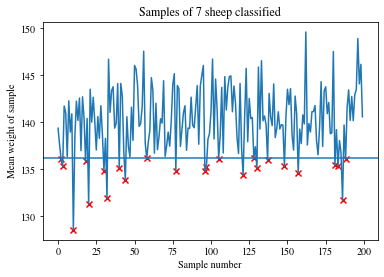

In [22]:
sheep_samples = sheep.rvs((200,n)).mean(axis = 1)

plt.plot(sheep_samples)
plt.scatter(np.arange(200)[sheep_samples < threshold], sheep_samples[sheep_samples < threshold], marker = 'x', color = 'red')
plt.axhline(threshold)
plt.title(f'Samples of {n} sheep classified')
plt.xlabel('Sample number')
plt.ylabel('Mean weight of sample');

### The *p*-value

Up until now, we have been using the threshold value to determine whether or not to reject $H_0$. An equivalent method is to use the *p*-value. The *p*-value is defined as "the probability of observing the given test statistic, or a more extreme test statistic, under the assumption that $H_0$ is true."

It has the same units, and a similar representation, as $\alpha$. That is to say, it represents an area under the $H_0$ curve from a given point out to the tail. Because it is an area under the curve, it represents the proportion of experiments that would yield a given result. 

The difference between $\alpha$ and $p$ is that $\alpha$ has a fixed value (0.05) and the threshold value is its boundary. $p$ uses the test statistic from the experiment as its boundary, and its value varies according to the results of our experiment.

If a given experiment yields a test statistic exactly at the threshold value, then $p$ and $\alpha$ will be equal. If the experiment yields a more extreme test statistic, $p$ will be farther out into the tail, and therefore smaller than $\alpha$. And if an experiment yields a less extreme test statistic, $p$ will be larger than $\alpha$.  

Therefore, the following two statements are equivalent:
* A test statistic more extreme than the threshold indicates that the results are unlikely under $H_0$ and therefore $H_0$ can be rejected.
* A $p$-value smaller than $\alpha$ indicates that the results are unlikely under $H_0$ and therefore $H_0$ can be rejected.

Let's look at a $p$-value on a chart of $H_0$ for a given experiment where we our sample of animals weights is $$[135, 134, 133, 138, 130, 128, 140]$$

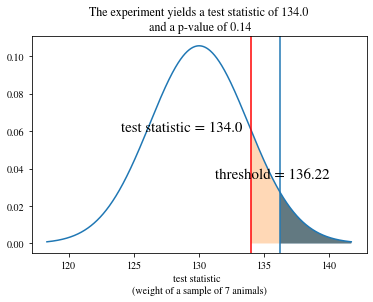

In [23]:
null_h = norm(𝜇_goats,𝜎_sample)
𝛼=0.05
threshold = null_h.ppf(1-𝛼)

sample = [135, 134, 133, 138, 130, 128, 140]
test_statistic = np.mean(sample)

lo, hi = null_h.ppf([0.001,0.999])
weight_range = np.linspace(lo, hi, 1001)
𝛼_range = np.linspace(threshold, hi, 101)

plt.plot(weight_range, null_h.pdf(weight_range))
plt.axvline(threshold);
plt.fill_between(𝛼_range, null_h.pdf(𝛼_range))
plt.annotate(f'threshold = {round(threshold,2)}', (threshold-5,0.035), fontsize = 15)
plt.xlabel(f'test statistic  \n(weight of a sample of {n} animals)')


plt.annotate(f'test statistic = {round(test_statistic,2)}', (test_statistic-10,0.06), fontsize = 15)
plt.axvline(test_statistic, color = 'red')

p_range = np.linspace(test_statistic, hi, 100)
plt.fill_between(p_range, null_h.pdf(p_range), alpha = .3)

p_value = 1-null_h.cdf(test_statistic)
plt.title(f'The experiment yields a test statistic of {test_statistic}\n and a p-value of {round(p_value,2)}');


In this example, the test statistic is less extreme than the threshold, and the $p$-value is greater than $\alpha$, so $H_0$ cannot be rejected.

Let's look at another sample where the weights are:
$$[145, 134, 133, 140, 140, 138, 140]$$

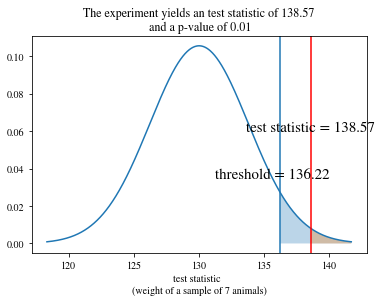

In [24]:
sample_2 =[145, 134, 133, 140, 140, 138, 140]

test_statistic = np.mean(sample_2)

plt.plot(weight_range, null_h.pdf(weight_range))
plt.axvline(threshold);
plt.fill_between(𝛼_range, null_h.pdf(𝛼_range), alpha = .3)
plt.annotate(f'threshold = {round(threshold,2)}', (threshold-5,0.035), fontsize = 15)
plt.xlabel(f'test statistic  \n(weight of a sample of {n} animals)')


plt.annotate(f'test statistic = {round(test_statistic,2)}', (test_statistic-5,0.06), fontsize = 15)
plt.axvline(test_statistic, color = 'red')

p_range = np.linspace(test_statistic, hi, 100)
plt.fill_between(p_range, null_h.pdf(p_range), alpha = .3)

p_value = 1-null_h.cdf(test_statistic)
plt.title(f'The experiment yields an test statistic of {round(test_statistic,2)}\n and a p-value of {round(p_value,2)}');


In this example, the test statistic is more extreme than the threshold, and the $p$-value is less than $\alpha$, so $H_0$ can be rejected.

## Conclusion:

* A *test statistic* is a single value that quantifies the results of an experiment
* A single experiment produces a test statistic, which is drawn from a distribution.
* With repeated experiments, the test statistic will take on a range of values varying from "typical" (under the assumption that the null hypothesis is true) to "unusual"
* $\alpha$ defines how unusual a result needs to be to reject $H_0$ and is represented as an area under the $H_0$ curve. Generally, we say 5% of results are considered unusual.
* A threshold is calculated from the bound of the region $\alpha$ and used to make determinations.
* $\beta$ and Power ($1-\beta$) cannot be set directly, but are determined by four factors (effect size, population standard deviation, $\alpha$ and sample size). 
* Generally, a Power $\ge 0.8$ is considered a good experiment.
* Of the four factors that determine $\beta$, we can generally only use sample size.
* The $p$-value is the proportion of results from $H_0$ that would be as or more extreme than the experiment's results. 
* Comparing $p$-value to $\alpha$ is equivalent to comparing the test statistic to the threshold.